In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
import gc
%matplotlib inline
from matplotlib.image import imread
import matplotlib.image as mpimg
from PIL import Image, ImageDraw
#import imgaug.augmenters as iaa
import cv2

In [3]:
# Set the data directory and folder names
data_dir = '/content/drive/MyDrive/animal_dataset'
folders = ['buffalo', 'cheetah', 'elephant', 'fox', 'jaguar', 'leopard', 'lion', 'panda', 'rhino', 'zebra']

### Exploratory Data Analysis

In [4]:
# Create empty lists to store the image files and text files
image_paths = []
annotation_paths = []

# Iterate over the folders
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    annotation_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
    image_paths.extend([os.path.join(folder_path, f) for f in image_files])
    annotation_paths.extend([os.path.join(folder_path, f) for f in annotation_files])

# Print the total number of images and annotations
print("Total number of images:", len(image_paths))
print("Total number of annotation files:", len(annotation_paths))

Total number of images: 2308
Total number of annotation files: 2320


### **Observation**

The dataset consists of 2308 images, while there are 2320 annotation files. This indicates that there are some annotation files that do not have corresponding image files or there are some corresponding image files with more than one animal species identified. It would be necessary to investigate and handle this mismatch before proceeding with further analysis.


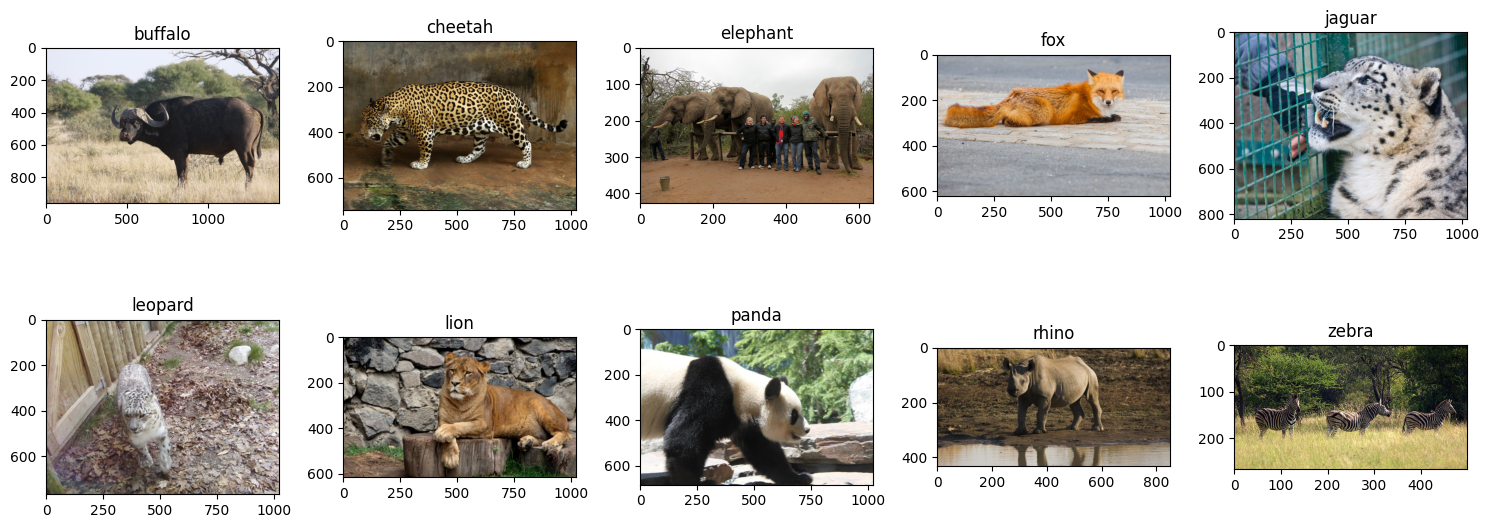

In [5]:
# Create subplots to display one image from each class
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

# Loop through the folders and display one image from each class
for i, folder in enumerate(folders):
    folder_path = os.path.join(data_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    sample_image_path = os.path.join(folder_path, image_files[0])
    image = cv2.imread(sample_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs[i].imshow(image)
    axs[i].set_title(folder)
    axs[i].axis()

plt.tight_layout()
plt.show()

In [9]:
# Class label and image count
class_labels = []
image_counts = []

# Iterate through each folder
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    class_labels.append(folder)
    image_counts.append(len(image_files))

# Create a dataframe
df = pd.DataFrame({'Class Label': class_labels, 'Image Count': image_counts})
df

,Class Label,Image Count
0,buffalo,377
1,cheetah,132
2,elephant,375
3,fox,150
4,jaguar,100
5,leopard,123
6,lion,208
7,panda,91
8,rhino,376
9,zebra,376


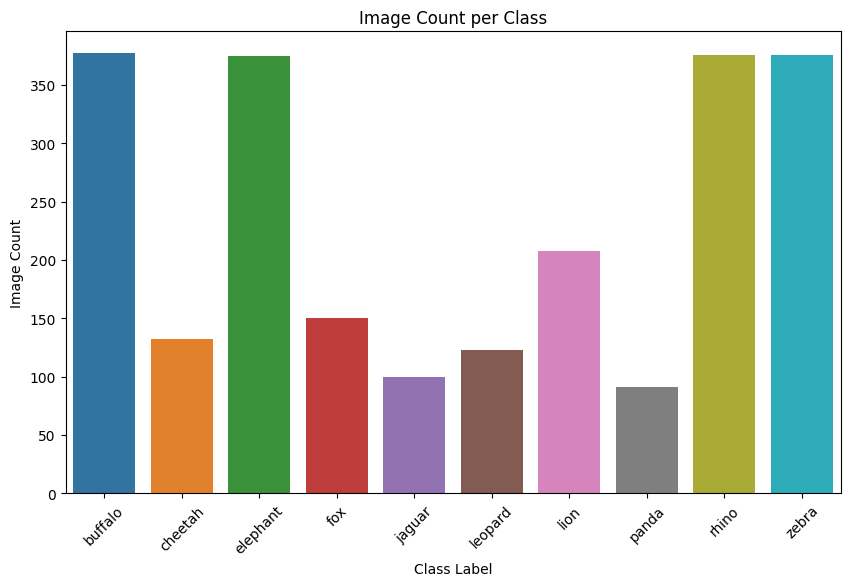

In [10]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Class Label', y='Image Count', data=df)
plt.xticks(rotation=45)
plt.xlabel('Class Label')
plt.ylabel('Image Count')
plt.title('Image Count per Class')
plt.show()

We also observed that the dataset contains images of various animal species, with the corresponding count for each class label. The buffalo class has the highest count with 377 images, while the panda class has the lowest count with 91 images.


In [11]:
# Pixels and Aspect Ration of Image files
image_dimensions = []

# Iterate through the images
for image_path in image_paths:
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    aspect_ratio = width / height
    pixels = height * width
    image_dimensions.append({'Image Path': image_path,
                             'Height': height,
                             'Width': width,
                             'Aspect Ratio': aspect_ratio,
                             'Pixels': pixels})

# Create a dataframe
df_dimensions = pd.DataFrame(image_dimensions)
df_dimensions.head()

,Image Path,Height,Width,Aspect Ratio,Pixels
0,/content/drive/MyDrive/animal_dataset/buffalo/...,960,1440,1.500000,1382400
1,/content/drive/MyDrive/animal_dataset/buffalo/...,600,400,0.666667,240000
2,/content/drive/MyDrive/animal_dataset/buffalo/...,540,960,1.777778,518400
3,/content/drive/MyDrive/animal_dataset/buffalo/...,720,1280,1.777778,921600
4,/content/drive/MyDrive/animal_dataset/buffalo/...,183,275,1.502732,50325


In [12]:
df_dimensions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Image Path    2308 non-null   object 
 1   Height        2308 non-null   int64  
 2   Width         2308 non-null   int64  
 3   Aspect Ratio  2308 non-null   float64
 4   Pixels        2308 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 90.3+ KB


In [13]:
# Summary statistics of image dimensions
df_dimensions.describe()

,Height,Width,Aspect Ratio,Pixels
count,2308.000000,2308.000000,2308.000000,2.308000e+03
mean,655.036828,900.774697,1.415327,7.434161e+05
std,353.411145,494.806377,0.311902,1.192588e+06
min,86.000000,99.000000,0.563477,1.109400e+04
25%,427.000000,640.000000,1.333333,2.732800e+05
50%,640.000000,900.000000,1.498829,6.348800e+05
75%,768.000000,1024.000000,1.505388,7.683840e+05
max,3888.000000,4500.000000,3.221477,1.234800e+07


In [14]:
# Correlation between height, width, and aspect ratio
correlation = df_dimensions[['Height', 'Width', 'Aspect Ratio']].corr()
correlation

,Height,Width,Aspect Ratio
Height,1.000000,0.877463,-0.238846
Width,0.877463,1.000000,0.208601
Aspect Ratio,-0.238846,0.208601,1.000000


Analyzing this dataset has provided valuable insights into its composition and image dimensions. These insights can guide further steps in the development of computer vision models for animal species detection, such as data preprocessing, model selection, and performance evaluation. Additionally, addressing the mismatch between annotation files and images is crucial to ensure the dataset's integrity and usability.